In [ ]:
#*cracks knuckles* "Heh, let's get this started"
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac
import pandas as pd

In [ ]:
spec = astropy.io.ascii.read("/content/drive/MyDrive/Colab Notebooks/solar_spectrum.txt", names = ["wavelength", "flux"])
spec

wavelength,flux
float64,int64
5866.0,9907
5866.01,9905
5866.02,9902
5866.032,9898
5866.042,9894
5866.054,9886
5866.064,9881
5866.076,9874
5866.086,9869


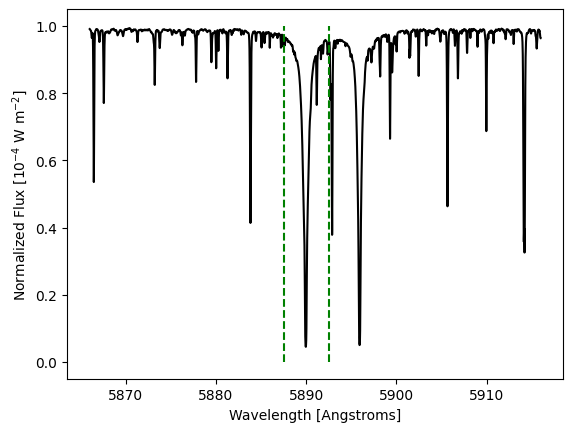

In [ ]:
#arbitrarily choosing values that have one of the doublet lines between them
plt.plot(spec['wavelength'], spec['flux'] / 1e4, c = 'k')
plt.vlines(5887.5, 0, 1, color = 'g', linestyle = '--')
plt.vlines(5892.5, 0, 1, color = 'g', linestyle = '--')
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Normalized Flux [10$^{-4}$ W m$^{-2}$]')
plt.show()

In [ ]:
# taking this from the example code we are indicing the dataset between the 2 chosen points and finding the wavelength spacing
ind = np.where((spec["wavelength"] < 5892.5) & (spec["wavelength"] > 5887.5))
inc = np.median(np.diff(spec["wavelength"][ind]))
ew = np.sum(1e4 - spec["flux"][ind]) * inc / 1e4

n = 8.24E14 * u.cm**-2
print("equivalent width (ew) = ", ew, " Angstrom")
print('atom density is', n)

equivalent width (ew) =  0.8346720000182191  Angstrom
atom density is 824000000000000.0 1 / cm2


In [ ]:
# from the example code we are given that there are 8.24*10**14 atoms per cm**2
# we can now answer the first question, find the ratio of sodium atoms in the ground state vs excited state
# woohoo! lets define some variables
T = 5778 * u.K # this is the sun afterall duh!

# assuming we are not worried about the fine structure splitting
g1 = 2 # this is from rigorous internet searching and not finding many answers other than this
g2 = 6 # same^^^^
# Ian from the future found that g_n = 2n, unsure why 3s is 2 but I see why 3p is. Maybe it is due to the orbitals


E1 = (ac.h * ac.c) / (5890 * u.AA) # this is for the ground state (3s) u.AA is angstroms
E2 = (ac.h * ac.c) / (5896 * u.AA) # this is for the excited state (3p)
#delta_E = E2 - E1
# after getting it wrong many times I found that deltaE = hc/lambda which gives me the correct answer
# this is because the energy to transition is proportional to lamda
# If you already know the wavelength of the emitted/absorbed photon, you don’t need both, just what was emmitted


ratio1 = (g2/g1) * np.exp(-(E1 / (ac.k_B * T)))
print(round(ratio1, 3), '= N_2 / N_1, This tells us that there are 0.044 excited state sodium atoms to ground state')

0.044 = N_2 / N_1, This tells us that there are 0.044 excited state sodium atoms to ground state


In [ ]:
# Now let us answer that beautiful second question given to us by our savior Ji Wang (I love Ji Wang)
P_e = 1.0 * u.N * (u.m**-2) # from example code P_e = n_e * k * T
Z_II = 1.0 # given
Z_I = 2.4 # given
chi = 5.1 * u.eV # given
# remember that other lines have different values so we may need to do some heavy research if we do the bonus

ratio2 = ((2 * ac.k_B * T) / P_e) * (Z_II / Z_I) * ((2 * np.pi * ac.m_e * ac.k_B * T) / ac.h**2)**(3/2) * np.exp(-chi / (ac.k_B * T))
print(round(ratio2.to(u.dimensionless_unscaled), 2), '= Na_II/Na_I, this tells us that there are 2510 ionized atoms to neutral')
# it is dimensionless and it succesfully comverted. For some reason it was not canceling units

2510.75 = Na_II/Na_I, this tells us that there are 2510 ionized atoms to neutral


In [ ]:
# holy moly are we cooking! Let's keep this going
# we have already defined all our N's for this third questions equation so we just need to plug in
col_den = n * (1 + ratio1) * (1 + ratio2)
print(col_den, ', which is 2.16*10^18 [total column density of sodium atoms] or total')

2.1602506231469914e+18 1 / cm2 , which is 2.16*10^18 [total column density of sodium atoms]


In [ ]:
# from the example code we are given an equation to find the abundance in astronomers term
# we know how to find it in physicist terms
n_H = 6.6E23 * u.cm**-2


phys_ab = n/n_H
astro_ab = 12 + np.log10(n/n_H)
print(phys_ab, ', which is the physical abundance')
print(astro_ab, ', which is the astronomical abundance')

1.2484848484848484e-09 , which is the physical abundance
3.0963832761552474 , which is the astronomical abundance
